In [7]:
# Import train_test_split function
# Import Gaussian Naive Bayes model
# Import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
# Load dataset
FoR_df = pd.read_csv('ML_data/FoR_bin_100.csv')
bin_width=100
max_val=100*50
def value_to_label(val):
    if val * bin_width == max_val:
        return 'greater than ' + str(max_val)
    else:
        return '[' + str(val * bin_width) + '-' + str(val * bin_width + bin_width) + ')'
    
labels = list(map(value_to_label,range(50)))

In [9]:
# creating labelEncoder
le = LabelEncoder()

# Converting string labels into numbers.
FoR_df_encoded = FoR_df.apply(le.fit_transform)

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(FoR_df_encoded[['id','year']].values, FoR_df['label'].values, test_size=0.3)  # 70% training and 30% test

In [11]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy on Test:  0.3181818181818182
Accuracy on Train:  0.3391304347826087


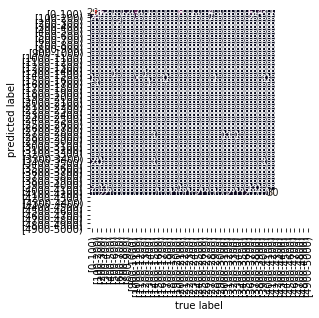

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on Test: ",gnb.score(X_test,y_test))
print("Accuracy on Train: ",gnb.score(X_train,y_train))

y_pred = gnb.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [13]:
print(gnb.predict([[0,3]]))


['[0-100)']
